In [1]:
!pip install torch torchvision diffusers transformers accelerate pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [7]:
rm -rf ~/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting

In [9]:
!pip install --upgrade diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 33.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.6.0
    Uninstalling accelerate-1.6.0:
      Successfully uninstalled accelerate-1.6.0


In [4]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16
).to("cuda")

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
import cv2

original = Image.open("/content/original_bowl.jpg").convert("RGB")

mask_cv = cv2.imread("/content/masked_Bowl_result_white.jpg", cv2.IMREAD_GRAYSCALE)
_, binary_mask = cv2.threshold(mask_cv, 128, 255, cv2.THRESH_BINARY)

mask = Image.fromarray(binary_mask).convert("RGB")

# === Run Inpainting pipeline ===
prompt = "a ceramic white bowl with blue floral pattern on a wooden kitchen counter, photorealistic lighting"

result = pipe(
    prompt=prompt,
    image=original,
    mask_image=mask,
    strength=1.0,           
    guidance_scale=7.5      
).images[0]
# === Save the Result ===
result.save("inpainted_result.png")
print("✅Done! Check inpainted_result.png")

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Done! Check inpainted_result.png


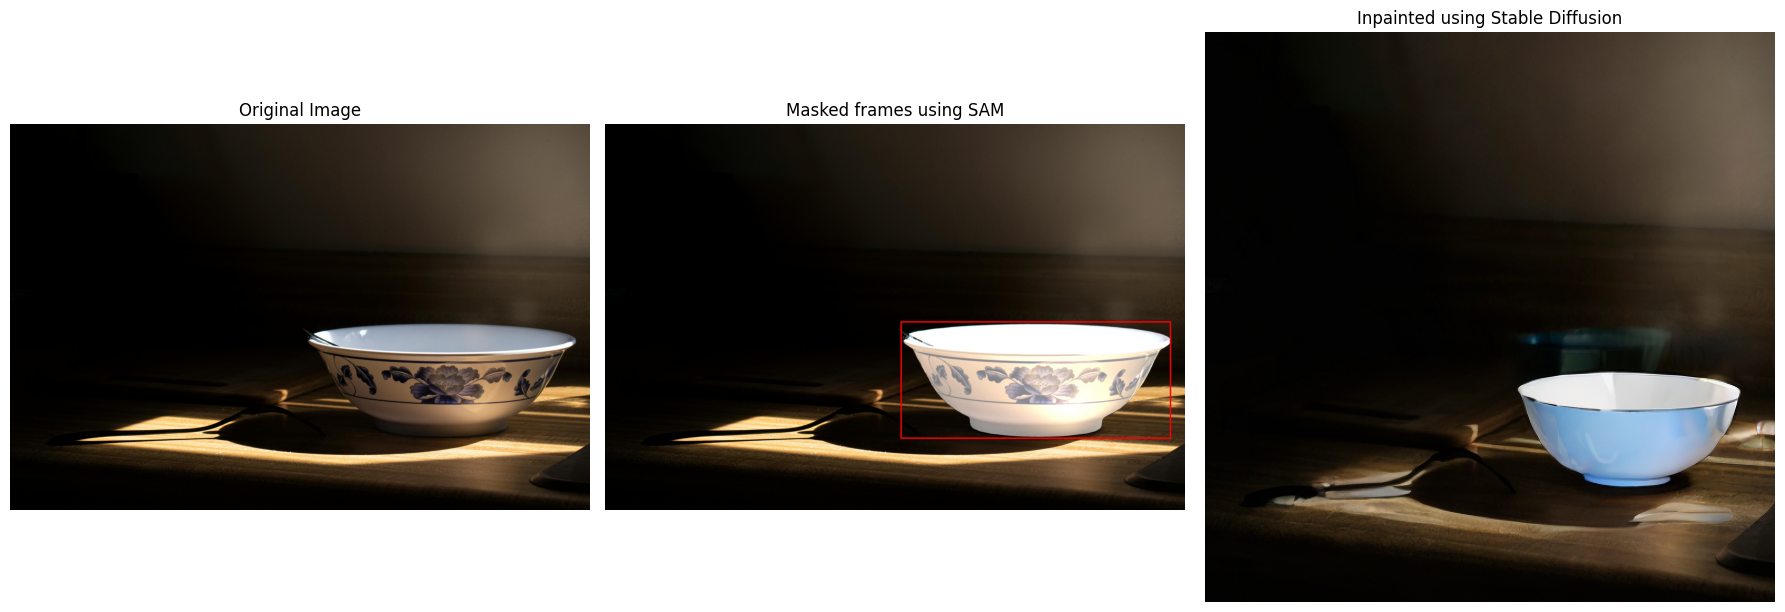

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

original = Image.open("/content/original_bowl.jpg").convert("RGB")
masked_original = Image.open("/content/masked_Bowl_result_white.jpg").convert("RGB")
inpainted = Image.open("/content/inpainted_result.png").convert("RGB")

#=== Plot side-by-side ===
plt.figure(figsize=(18, 6))

##----- Original image
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

##----- Masked using YOLO and SAM
plt.subplot(1, 3, 2)
plt.imshow(masked_original)
plt.title("Masked frames using SAM")
plt.axis("off")

##----- Inpainted Result
plt.subplot(1, 3, 3)
plt.imshow(inpainted)
plt.title("Inpainted using Stable Diffusion")
plt.axis("off")

plt.tight_layout()
plt.show()